<div style="text-align: center;">
  <h1>CREDIT CARD FRAUD DETECTION</h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate


### 1. Import The DataSet

In [2]:
credit_card = pd.read_csv("/dataset.csv")

### 2. Exploratory Data Analysis (EDA)

In [3]:
rows, columns = credit_card.shape
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {columns}")

Number of Rows: 284807
Number of Columns: 31


In [4]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
credit_card.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
credit_card.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [9]:
credit_card.duplicated().any()

True

In [10]:
credit_card.shape

(284807, 31)

In [11]:
# Remove duplication
data= credit_card.drop_duplicates()

In [12]:
print(f"Dublicate Transaction:",284807 - 283726)

Dublicate Transaction: 1081


In [13]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
data.duplicated().any()

False

In [16]:
data.shape

(283726, 31)

In [17]:
credit_card['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [18]:
fraud,legitimate = credit_card['Class'].value_counts()

print(f"Fraud Transaction(0): {fraud}")
print(f"Legitimate Transaction (1): {legitimate}")
print(f"This is imbalnce data")


Fraud Transaction(0): 284315
Legitimate Transaction (1): 492
This is imbalnce data


In [19]:
fraud = credit_card[credit_card['Class']==0]
legitimate = credit_card[credit_card['Class']==1]

In [20]:
fraud.value_counts()

Time      V1         V2         V3         V4         V5         V6         V7         V8         V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.196037   1.585949   2.883976   3.378471   1.511706   3.717077   0.585362  -0.156001   0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294   0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56    0        18
          -1.203617   1.574009   2.889277   3.381404   1.538663   3.698747   0.560211  -0.150911   0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727   0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.855262  1.51    0   

In [21]:
legitimate.value_counts()


Time      V1          V2         V3          V4        V5          V6         V7          V8          V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
68207.0   -13.192671  12.785971  -9.906650   3.320337  -4.801176    5.760059  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711   -0.226074  -6.211557   -6.248145   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.00    1        6
94362.0   -26.457745  16.497472  -30.177317  8.904157  -17.892600  -1.227904  -31.197329  -11.438920  -9.462573  -22.187089   4.419997  -10.592305  -0.703796  -3.926207   -2.400246  -6.809890   -12.462315  -5.501051  -0.567940   2.812241  -8.755698    3.460893   0.896538   0.254836  -0.738097  -0.966564  -7.26

In [22]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [23]:
X = data.drop('Class', axis=1)
Y = data['Class']


### 3. Handling Imbalanced Data 

                  Handling imbalanced data is a crucial aspect of machine learning, as many real-world datasets often have significant class imbalances. Resampling techniques are commonly used to address this issue.It consists of removing       samples from the majority class (under-sampling) or adding more examples from the minority class (over-sampling).
 

#### I handle imbalanced data using Synthetic Minority Oversampling Technique (SMOTE)
                  SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority     class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.


In [24]:
X.shape

(283726, 30)

In [25]:
Y.shape

(283726,)

In [26]:
 # You can specify a random state for reproducibility
smote = SMOTE(random_state=42) 
x_smote, y_smote = smote.fit_resample(X, Y)


In [27]:
y_smote.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [28]:
print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 283253, 1: 283253})


### 4. Split the Dataset for Test and Train


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size=0.20, random_state=42)


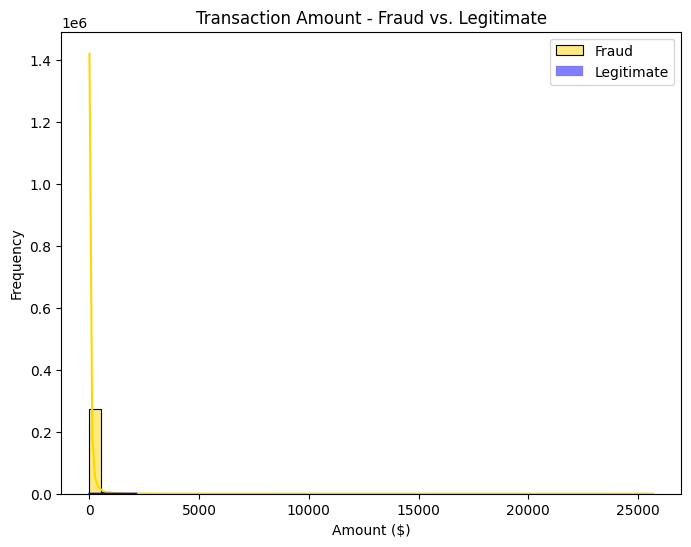

In [30]:
fraud_data = data[data['Class'] == 0]
legitimate_data = data[data['Class'] == 1]
plt.figure(figsize=(8, 6))
plt.title("Transaction Amount - Fraud vs. Legitimate")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
sns.histplot(fraud_data['Amount'], bins=50, kde=True, color="gold", label="Fraud")
sns.histplot(legitimate_data['Amount'], bins=50, kde=True, color="blue", label="Legitimate")
plt.legend()
plt.show()


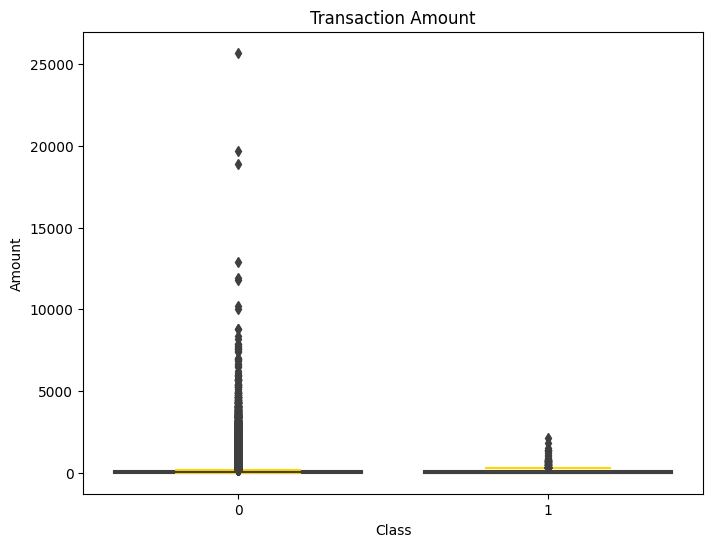

In [31]:
plt.figure(figsize=(8, 6))
plt.title("Transaction Amount")
sns.boxplot(x="Class", y="Amount", data=data, boxprops=dict(facecolor="blue"), whiskerprops=dict(color="gold"), capprops=dict(color="gold"))
plt.show()


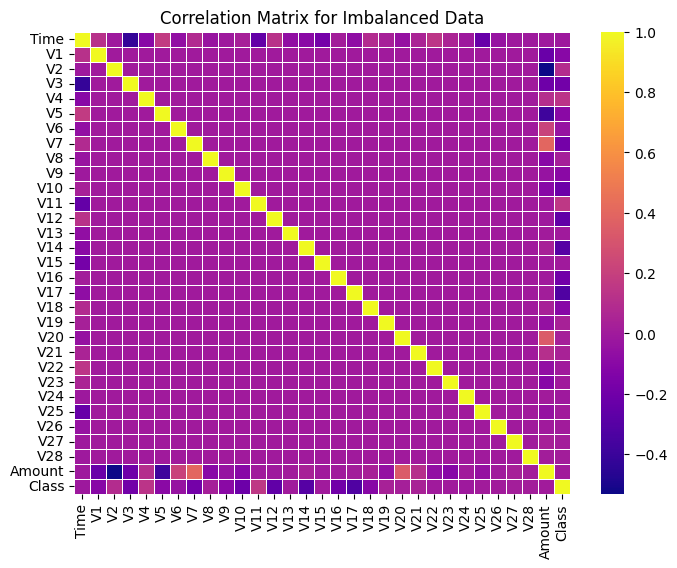

In [32]:
corr_imbalanced = credit_card.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_imbalanced, annot=False, cmap="plasma", linewidths=0.5)
plt.title("Correlation Matrix for Imbalanced Data")
plt.show()

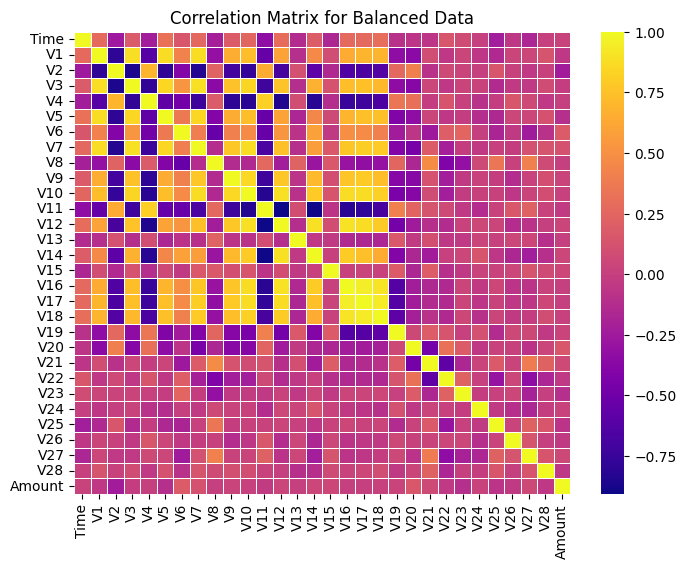

In [33]:
corr_balanced = x_smote.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_balanced, annot=False, cmap="plasma", linewidths=0.5)
plt.title("Correlation Matrix for Balanced Data")
plt.show()

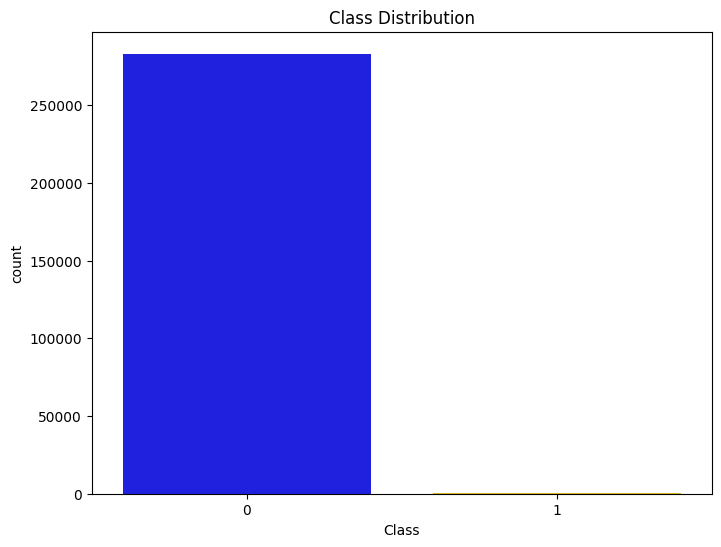

In [34]:
custom_palette = sns.color_palette(["blue", "gold"])
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=data, palette=custom_palette)
plt.title("Class Distribution")
plt.show()


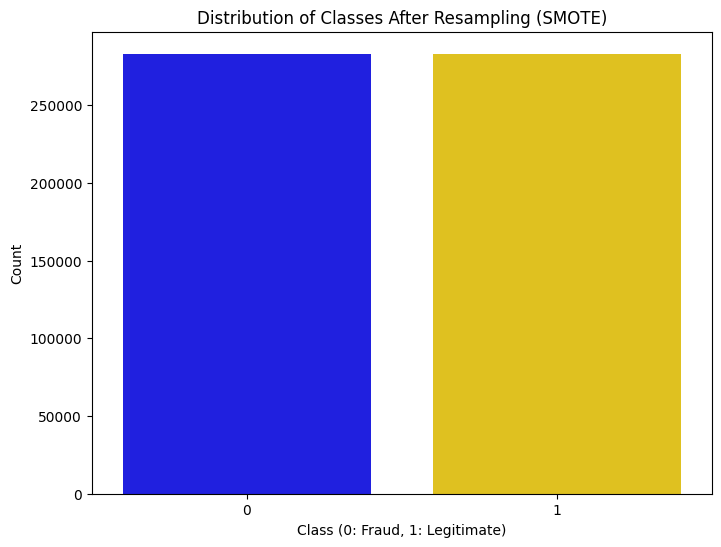

In [35]:
custom_palette = sns.color_palette(["blue", "gold"])
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote, palette=custom_palette)
plt.title("Distribution of Classes After Resampling (SMOTE)")
plt.xlabel("Class (0: Fraud, 1: Legitimate)")
plt.ylabel("Count")
plt.show()


In [36]:
# Build the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, Y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### 5. Predict the Model

1. Predict Transactions as fraudulent or genuine by giving Random Sample
2. Predict Transactions as fraudulent or genuine by using my dataset value [23	,1.322707269,	-0.174040833,	0.434555031	,0.576037652	-0.836758046	-0.831083411	-0.264904961	-0.220981943	-1.071424618	0.868558548	-0.64150629	-0.111315775	0.36148541	0.171945122	0.782166532	-1.35587073	-0.216935153	1.271765385	-1.240621935	-0.522950941	-0.284375572	-0.323357411	-0.037709905	0.347150939	0.559639137	-0.280158166	0.042335258	0.0288223	16	0 ]

In [37]:
Y_pred_logistic = logistic_model.predict(X_test)


In [38]:
transaction_data = pd.DataFrame({
    'Time': [16],
    'V1': [1.322707269],
    'V2': [-0.174040833],
    'V3': [0.434555031],
    'V4': [0.576037652],
    'V5': [-0.836758046],
    'V6': [-0.831083411],
    'V7': [-0.264904961],
    'V8': [-0.220981943],
    'V9': [-1.071424618],
    'V10': [0.868558548],
    'V11': [-0.64150629],
    'V12': [-0.111315775],
    'V13': [0.36148541],
    'V14': [0.171945122],
    'V15': [0.782166532],
    'V16': [-1.35587073],
    'V17': [-0.216935153],
    'V18': [1.271765385],
    'V19': [-1.240621935],
    'V20': [-0.522950941],
    'V21': [-0.284375572],
    'V22': [-0.323357411],
    'V23': [-0.037709905],
    'V24': [0.347150939],
    'V25': [0.559639137],
    'V26': [-0.280158166],
    'V27': [0.042335258],
    'V28': [0.0288223],
    'Amount': [0],
    'Class': [0]  
})

new_predictions = logistic_model.predict(transaction_data.drop(columns=['Class']))

if new_predictions[0] == 1:
    print("Time: 16\nPredict: Fraudulent Transaction")
else:
    print("Time: 16\nPredict: Genuine Transaction")


Time: 16
Predict: Fraudulent Transaction


In [39]:
# Define the minimum and maximum 'Time' values from your training data
min_time = data['Time'].min()
max_time = data['Time'].max()

random_transactions = []

# Generate 28 random transactions
for _ in range(28):
    new_transaction = {
        'Time': np.random.uniform(min_time, max_time), 
        'Amount': np.random.uniform(0, 500),
        'V1': np.random.uniform(-2, 2),
        'V2': np.random.uniform(-2, 2),
        'V3': np.random.uniform(-2, 2),
        'V4': np.random.uniform(-2, 2),
        'V5': np.random.uniform(-2, 2),
        'V6': np.random.uniform(-2, 2),
        'V7': np.random.uniform(-2, 2),
        'V8': np.random.uniform(-2, 2),
        'V9': np.random.uniform(-2, 2),
        'V10': np.random.uniform(-2, 2),
        'V11': np.random.uniform(-2, 2),
        'V12': np.random.uniform(-2, 2),
        'V13': np.random.uniform(-2, 2),
        'V14': np.random.uniform(-2, 2),
        'V15': np.random.uniform(-2, 2),
        'V16': np.random.uniform(-2, 2),
        'V17': np.random.uniform(-2, 2),
        'V18': np.random.uniform(-2, 2),
        'V19': np.random.uniform(-2, 2),
        'V20': np.random.uniform(-2, 2),
        'V21': np.random.uniform(-2, 2),
        'V22': np.random.uniform(-2, 2),
        'V23': np.random.uniform(-2, 2),
        'V24': np.random.uniform(-2, 2),
        'V25': np.random.uniform(-2, 2),
        'V26': np.random.uniform(-2, 2),
        'V27': np.random.uniform(-2, 2),
        'V28': np.random.uniform(-2, 2),
    }
    random_transactions.append(new_transaction)


random_data = pd.DataFrame(random_transactions, columns=X_train.columns)  # Use the same feature order
random_predictions = logistic_model.predict(random_data)

for i, prediction in enumerate(random_predictions):
    if prediction == 0:
        print(f"Transaction {i + 1}: Genuine Transaction")
    else:
        print(f"Transaction {i + 1}: Fraudulent Transaction")


Transaction 1: Genuine Transaction
Transaction 2: Genuine Transaction
Transaction 3: Fraudulent Transaction
Transaction 4: Genuine Transaction
Transaction 5: Genuine Transaction
Transaction 6: Genuine Transaction
Transaction 7: Genuine Transaction
Transaction 8: Genuine Transaction
Transaction 9: Genuine Transaction
Transaction 10: Genuine Transaction
Transaction 11: Genuine Transaction
Transaction 12: Genuine Transaction
Transaction 13: Genuine Transaction
Transaction 14: Genuine Transaction
Transaction 15: Genuine Transaction
Transaction 16: Genuine Transaction
Transaction 17: Fraudulent Transaction
Transaction 18: Genuine Transaction
Transaction 19: Genuine Transaction
Transaction 20: Genuine Transaction
Transaction 21: Fraudulent Transaction
Transaction 22: Genuine Transaction
Transaction 23: Genuine Transaction
Transaction 24: Genuine Transaction
Transaction 25: Genuine Transaction
Transaction 26: Fraudulent Transaction
Transaction 27: Genuine Transaction
Transaction 28: Genuine T

In [40]:
# Calculate performance metrics for the Logistic Regression model
confusion_matrix_logistic = confusion_matrix(Y_test, Y_pred_logistic)
classification_report_logistic = classification_report(Y_test, Y_pred_logistic, output_dict=True)

confusion_matrix_df = pd.DataFrame(confusion_matrix_logistic, 
                                   columns=["Predicted Negative (0)", "Predicted Positive (1)"],
                                   index=["Actual Negative (0)", "Actual Positive (1)"])

classification_report_df = pd.DataFrame(classification_report_logistic)

print("Logistic Regression Model - Confusion Matrix:")
print(confusion_matrix_df)

print("\nLogistic Regression Model - Classification Report:")
print(classification_report_df)

Logistic Regression Model - Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                   55225                    1238
Actual Positive (1)                    2120                   54719

Logistic Regression Model - Classification Report:
                      0             1  accuracy      macro avg   weighted avg
precision      0.963031      0.977876  0.970362       0.970453       0.970478
recall         0.978074      0.962702  0.970362       0.970388       0.970362
f1-score       0.970494      0.970229  0.970362       0.970362       0.970361
support    56463.000000  56839.000000  0.970362  113302.000000  113302.000000


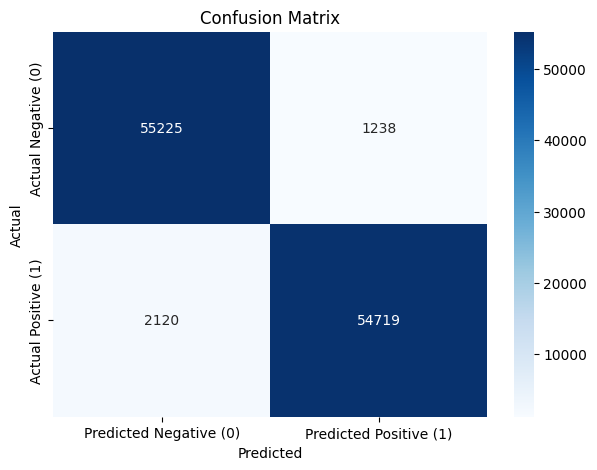

In [41]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

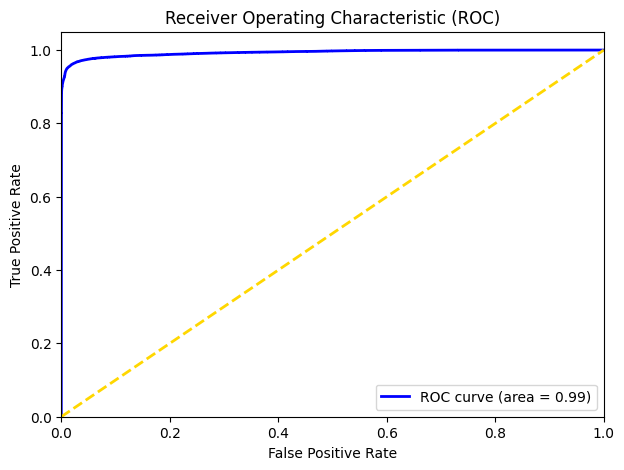

In [42]:
# Calculate ROC-AUC Score and Plot ROC Curve
from sklearn.metrics import roc_curve, auc
y_scores = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gold', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

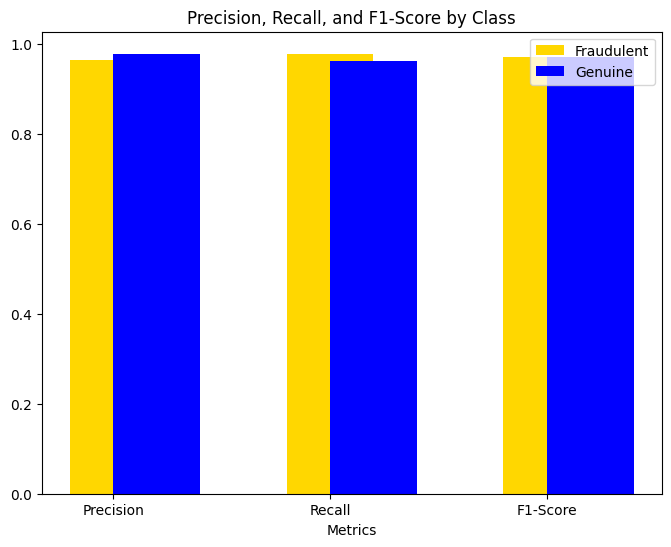

In [43]:
fraud_metrics = [classification_report_df['0']['precision'], classification_report_df['0']['recall'], classification_report_df['0']['f1-score']]
legitimate_metrics = [classification_report_df['1']['precision'], classification_report_df['1']['recall'], classification_report_df['1']['f1-score']]

metrics_labels = ['Precision', 'Recall', 'F1-Score']
x = range(len(metrics_labels))

plt.figure(figsize=(8, 6))
plt.bar(x, fraud_metrics, width=0.4, label='Fraudulent', align='center', color='gold')
plt.bar(x, legitimate_metrics, width=0.4, label='Genuine', align='edge', color='blue')
plt.xlabel('Metrics')
plt.xticks(x, metrics_labels)
plt.title("Precision, Recall, and F1-Score by Class")
plt.legend()
plt.show()
